In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df=pd.read_csv('pneumonia_dataset.csv')

In [ ]:
df.shape

(30000, 11)

In [ ]:
df.head()

,Age,Gender,Chest_Pain,Fever,Cough,Shortness_of_Breath,Smoking_History,BMI,Diabetes,Heart_Disease,Prediction
0,72,Male,Yes,No,Yes,Yes,Never,32.0,Yes,Yes,Pneumonia
1,2,Female,No,Yes,No,No,Never,24.9,No,No,No Pneumonia
2,31,Male,No,No,Yes,No,Never,33.4,Yes,Yes,No Pneumonia
3,61,Male,Yes,No,No,No,Never,26.6,Yes,No,No Pneumonia
4,26,Male,Yes,Yes,Yes,No,Current,22.2,Yes,No,Pneumonia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  30000 non-null  int64  
 1   Gender               30000 non-null  object 
 2   Chest_Pain           30000 non-null  object 
 3   Fever                30000 non-null  object 
 4   Cough                30000 non-null  object 
 5   Shortness_of_Breath  30000 non-null  object 
 6   Smoking_History      30000 non-null  object 
 7   BMI                  30000 non-null  float64
 8   Diabetes             30000 non-null  object 
 9   Heart_Disease        30000 non-null  object 
 10  Prediction           30000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Chest_Pain,0
Fever,0
Cough,0
Shortness_of_Breath,0
Smoking_History,0
BMI,0
Diabetes,0
Heart_Disease,0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Fever', 'Cough', 'Shortness_of_Breath',
       'Smoking_History', 'BMI', 'Diabetes', 'Heart_Disease', 'Prediction'],
      dtype='object')

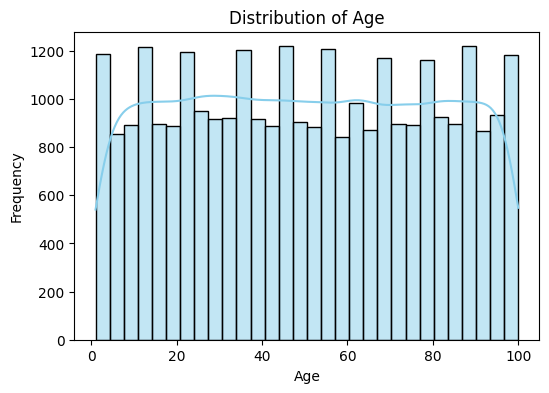

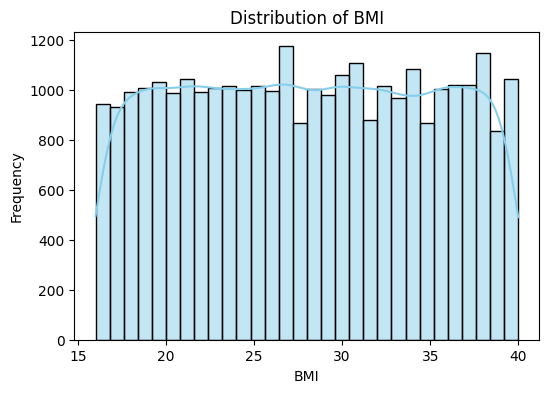

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_cols = ['Age', 'BMI']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Pre P-Neumonia Detection based on Patients Symptoms using ANN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the data (assuming you have a CSV file)
df=pd.read_csv('/content/drive/MyDrive/pneumonia_dataset.csv')

X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

le_dict = {}
categorical_columns = ['Gender', 'Chest_Pain', 'Fever', 'Cough', 'Shortness_of_Breath', 'Smoking_History', 'Diabetes', 'Heart_Disease']
for col in categorical_columns:
    le_dict[col] = LabelEncoder()
    X[col] = le_dict[col].fit_transform(X[col].astype(str))


X = pd.get_dummies(X, columns=categorical_columns)

# Save column names before converting to numpy array
X_columns = X.columns

# Convert to numpy arrays
X = X.values
y = LabelEncoder().fit_transform(y)  # Encode the target variable as well

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    # First hidden layer
    Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize activations to avoid overfitting
    Dropout(0.5),

    # Second hidden layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Third hidden layer
    Dense(64, activation='sigmoid'),
    Dropout(0.4),

    # Fourth hidden layer
    Dense(32, activation='sigmoid'),
    Dropout(0.3),

    # Output layer
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#callbacks for dynamic learning rate adjustment and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[lr_scheduler, early_stopping])

model.save('pneumonia_ann_model.h5')

# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))

def get_patient_input():
    input_data = {}
    input_data['Age'] = float(input("Enter age: "))
    input_data['Gender'] = input("Enter gender (Male/Female): ").lower()
    input_data['Chest_Pain'] = input("Enter chest pain type (Yes/No): ").lower()
    input_data['Fever'] = input("Do you have fever? (Yes/No): ").lower()
    input_data['Cough'] = input("Do you have cough? (Yes/No): ").lower()
    input_data['Shortness_of_Breath'] = input("Do you have shortness of breath? (Yes/No): ").lower()
    input_data['Smoking_History'] = input("Do you have a smoking history? (Yes/No): ").lower()
    input_data['BMI'] = float(input("Enter BMI: "))
    input_data['Diabetes'] = input("Do you have diabetes? (Yes/No): ").lower()
    input_data['Heart_Disease'] = input("Do you have heart disease? (Yes/No): ").lower()

    return pd.DataFrame([input_data])

def encode_with_unseen(le, labels):
    try:
        return le.transform(labels)
    except ValueError:
        return np.array([len(le.classes_)] * len(labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5607 - loss: 0.6992 - val_accuracy: 0.6410 - val_loss: 0.6469 - learning_rate: 1.0000e-05
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5999 - loss: 0.6729 - val_accuracy: 0.6410 - val_loss: 0.6118 - learning_rate: 1.0000e-05
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6124 - loss: 0.6582 - val_accuracy: 0.6426 - val_loss: 0.5807 - learning_rate: 1.0000e-05
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6367 - loss: 0.6410 - val_accuracy: 0.6629 - val_loss: 0.5559 - learning_rate: 1.0000e-05
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6580 - loss: 0.6177 - val_accuracy: 0.7060 - val_loss: 0.5311 - learning_rate: 1.0000e-05
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6737 - loss: 0.5989 - val_accuracy: 0.7545 - val_loss: 0.5058 - learning_rate: 1.0000e-05
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6896 - 

Test accuracy: 0.8772
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      3310
           1       0.85      0.98      0.91      5690

    accuracy                           0.88      9000
   macro avg       0.90      0.84      0.86      9000
weighted avg       0.89      0.88      0.87      9000



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,229 (579.02 KB)

 Trainable params: 49,153 (192.00 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 98,308 (384.02 KB)

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

accuracy_difference = abs(train_accuracy - test_accuracy)
print(f"Difference between train and test accuracy: {accuracy_difference:.4f}")

Train accuracy: 0.8776
Test accuracy: 0.8772
Difference between train and test accuracy: 0.0003


In [ ]:
def get_healthcare_recommendations(risk_score):
    """Return healthcare recommendations based on the pneumonia risk score."""
    if risk_score < 0.3:
        return "Maintain a healthy lifestyle: eat a balanced diet, exercise regularly, and stay hydrated."
    elif risk_score < 0.7:
        return "Consider getting vaccinated against pneumonia and flu. Monitor your symptoms closely."
    else:
        return "High risk of pneumonia. Consult a healthcare provider immediately for further evaluation."

def predict_pneumonia(patient_data):
    # Encoding categorical variables
    for col in categorical_columns:
        patient_data[col] = encode_with_unseen(le_dict[col], patient_data[col])

    # One-hot encoding
    patient_data = pd.get_dummies(patient_data, columns=categorical_columns)

    # Ensure all columns from training data are present
    for col in X_columns:
        if col not in patient_data.columns:
            patient_data[col] = 0

    # Reorder columns to match the training data
    patient_data = patient_data.reindex(columns=X_columns, fill_value=0)

    # Convert to numpy array and scale
    patient_data = patient_data.values
    patient_data_scaled = scaler.transform(patient_data)

    # Making prediction
    prediction = model.predict(patient_data_scaled)

    return prediction[0][0]

# Main loop for the recommender system
while True:
    print("\nPneumonia Detection System")
    patient_data = get_patient_input()
    risk_score = predict_pneumonia(patient_data)

    print(f"\nPneumonia Risk Score: {risk_score:.2f}")

    # Get healthcare recommendations based on the risk score
    recommendations = get_healthcare_recommendations(risk_score)
    print(f"Recommendations: {recommendations}")

    if risk_score > 0.5:
        print("High risk of pneumonia. Please consult a doctor immediately.")
    else:
        print("Low risk of pneumonia. However, if symptoms persist, please consult a doctor.")

    continue_check = input("\nDo you want to check another patient? (yes/no): ")
    if continue_check.lower() != 'yes':
        break

print("Thank you for using the Pneumonia Detection System.")



Pneumonia Detection System
Enter age: 50
Enter gender (Male/Female): female
Enter chest pain type (Yes/No): yes
Do you have fever? (Yes/No): no
Do you have cough? (Yes/No): no
Do you have shortness of breath? (Yes/No): no
Do you have a smoking history? (Yes/No): no
Enter BMI: 23
Do you have diabetes? (Yes/No): yes
Do you have heart disease? (Yes/No): no
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

Pneumonia Risk Score: 0.64
Recommendations: Consider getting vaccinated against pneumonia and flu. Monitor your symptoms closely.
High risk of pneumonia. Please consult a doctor immediately.

Do you want to check another patient? (yes/no): yes

Pneumonia Detection System
Enter age: 20
Enter gender (Male/Female): male
Enter chest pain type (Yes/No): no
Do you have fever? (Yes/No): no
Do you have cough? (Yes/No): no
Do you have shortness of breath? (Yes/No): no
Do you have a smoking history? (Yes/No): no
Enter BMI: 35
Do you have diabetes? (Yes/No): no
Do you have heart disease? (Yes/No): no
1/1 ━━

**Loading Saved ANN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('pneumonia_ann_model.h5')

**P-Neumonia Detection using X-Ray Images using CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
val_data = val_test_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
test_data = val_test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False
)

# Load pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers[:140]:  # Unfreezing last few layers for fine-tuning
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compiling the model with SGD optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_data, epochs=3, validation_data=val_data,
    callbacks=[early_stopping, lr_scheduler]
)

model.save('pneumonia_model.h5')
print("Model saved successfully!")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7621 - loss: 0.4617 - val_accuracy: 0.5000 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 155s 584ms/step - accuracy: 0.8408 - loss: 0.3447 - val_accuracy: 0.5000 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 579ms/step - accuracy: 0.8601 - loss: 0.3142 - val_accuracy: 0.6875 - val_loss: 0.5209 - learning_rate: 0.0010


Model saved successfully!
20/20 ━━━━━━━━━━━━━━━━━━━━ 246s 13s/step - accuracy: 0.8709 - loss: 0.3724
Test Accuracy: 81.57%


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Optionally, if you want to print the training accuracy during the training process, you can extract it from `history`
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy from history
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - accuracy: 0.8709 - loss: 0.3724
Test Accuracy: 81.57%
Train Accuracy: 85.68%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Function to preprocess the image for prediction
def preprocess_image(img_path, target_size=(150,150)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize image to [0, 1]
    return img_array

# Path to your image
img_path = 'chest_xray/test/PNEUMONIA/person100_bacteria.jpeg'

# Preprocessing the image
preprocessed_image = preprocess_image(img_path)

#prediction
prediction = model.predict(preprocessed_image)

#output
if prediction[0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: Pneumonia


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,664,964 (155.12 MB)

 Trainable params: 16,027,649 (61.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

 Optimizer params: 16,027,651 (61.14 MB)

**Loading Saved Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('pneumonia_model.h5')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,315 (93.98 MB)

 Trainable params: 16,027,649 (61.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

 Optimizer params: 2 (12.00 B)

**GUI**

In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

ann_model = load_model('pneumonia_ann_model.h5')
cnn_model = load_model('pneumonia_model.h5')

# ANN Prediction Function
def ann_predict(age, gender, chest_pain, fever, cough, shortness_of_breath, smoking_history, bmi, diabetes, heart_disease):
    try:
        # Convert categorical inputs to numerical
        gender = 1 if gender.lower() == "male" else 0
        chest_pain = 1 if chest_pain else 0
        fever = 1 if fever else 0
        cough = 1 if cough else 0
        shortness_of_breath = 1 if shortness_of_breath else 0
        smoking_history = 1 if smoking_history else 0
        diabetes = 1 if diabetes else 0
        heart_disease = 1 if heart_disease else 0

        # Prepare input array with 19 features (adjust according to your model)
        input_data = np.array([[age, gender, chest_pain, fever, cough, shortness_of_breath, smoking_history, bmi, diabetes, heart_disease]])

        # Add the remaining 9 features if required by the ANN model.
        input_data = np.pad(input_data, ((0, 0), (0, 9)), mode='constant')

        # Make prediction
        prediction = ann_model.predict(input_data)
        result = "Pneumonia" if prediction >= 0.5 else "No Pneumonia"
        return result
    except Exception as e:
        return f"Error: {str(e)}"

# CNN Prediction Function
def cnn_predict(image):
    try:
        # Resize and preprocess the image to the required shape (150x150)
        image = tf.image.resize(image, [150, 150]) / 255.0
        image = np.expand_dims(image, axis=0)  # Add batch dimension

        # Make prediction
        prediction = cnn_model.predict(image)
        result = "Pneumonia" if prediction >= 0.5 else "No Pneumonia"
        return result
    except Exception as e:
        return f"Error: {str(e)}"

# Reset function for input fields
def reset_ann_inputs():
    return [None] * 10

def reset_cnn_input():
    return None

# Create the GUI with Gradio
with gr.Blocks() as demo:
    gr.Markdown("<h1>Welcome to Abu Bakar Siddiq Pneumonia Detection Model</h1>")

    with gr.Tab("ANN Model"):
        gr.Markdown("### Pneumonia Detection using ANN")

        ann_inputs = [
            gr.Number(label="Age"),
            gr.Radio(["Male", "Female"], label="Gender"),
            gr.Radio(["Yes", "No"], label="Chest Pain"),
            gr.Radio(["Yes", "No"], label="Fever"),
            gr.Radio(["Yes", "No"], label="Cough"),
            gr.Radio(["Yes", "No"], label="Shortness of Breath"),
            gr.Radio(["Yes", "No"], label="Smoking History"),
            gr.Number(label="BMI"),
            gr.Radio(["Yes", "No"], label="Diabetes"),
            gr.Radio(["Yes", "No"], label="Heart Disease"),
        ]

        ann_output = gr.Label(label="Prediction")
        ann_btn = gr.Button("Predict")
        refresh_btn = gr.Button("Refresh")

        ann_btn.click(ann_predict, inputs=ann_inputs, outputs=ann_output)
        refresh_btn.click(reset_ann_inputs, inputs=[], outputs=ann_inputs)

    with gr.Tab("CNN Model"):
        gr.Markdown("### Pneumonia Detection using CNN")
        cnn_input = gr.Image(label="Upload X-ray Image")
        cnn_output = gr.Label(label="Prediction")
        cnn_btn = gr.Button("Predict")
        refresh_cnn_btn = gr.Button("Refresh")

        cnn_btn.click(cnn_predict, inputs=cnn_input, outputs=cnn_output)
        refresh_cnn_btn.click(reset_cnn_input, inputs=[], outputs=[cnn_input])

    demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://07fe9ddfe99196f6be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
